In [1]:
library(sitePath)
library(ggplot2)
suppressPackageStartupMessages(library(ggtree))

PLOTS_DIR <- "Plots"

PATH_SNP_PROP <- 0.025

Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 



In [2]:
data(h3n2_align)
data(h3n2_tree)

tr <- addMSA(h3n2_tree, alignment = h3n2_align)

tree <- as.phylo(tr)
nTips <- length(tree[["tip.label"]])

The "tree" object is not bifurcated and resolved by "multi2di" function.



In [3]:
snpSites <- SNPsites(tr)

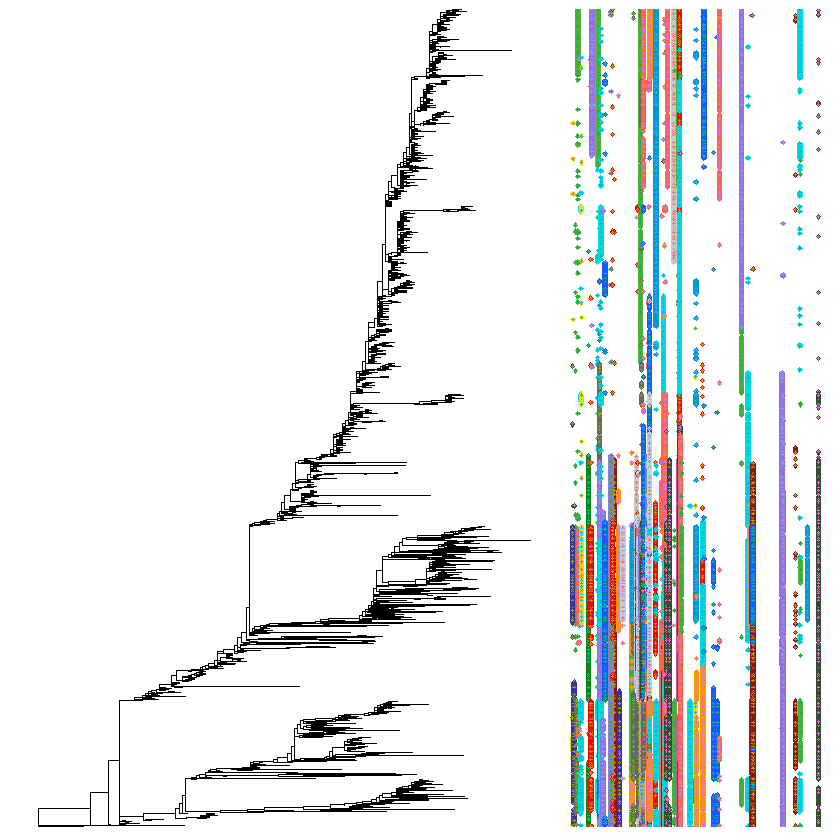

In [4]:
p <- plotMutSites(snpSites)
p

In [5]:
ggsave(
    filename = file.path(PLOTS_DIR, "snpTree.svg"),
    plot = p, 
    device = "svg",
    width = 18,
    height = 18
)

In [6]:
paths <- lineagePath(tr, PATH_SNP_PROP)

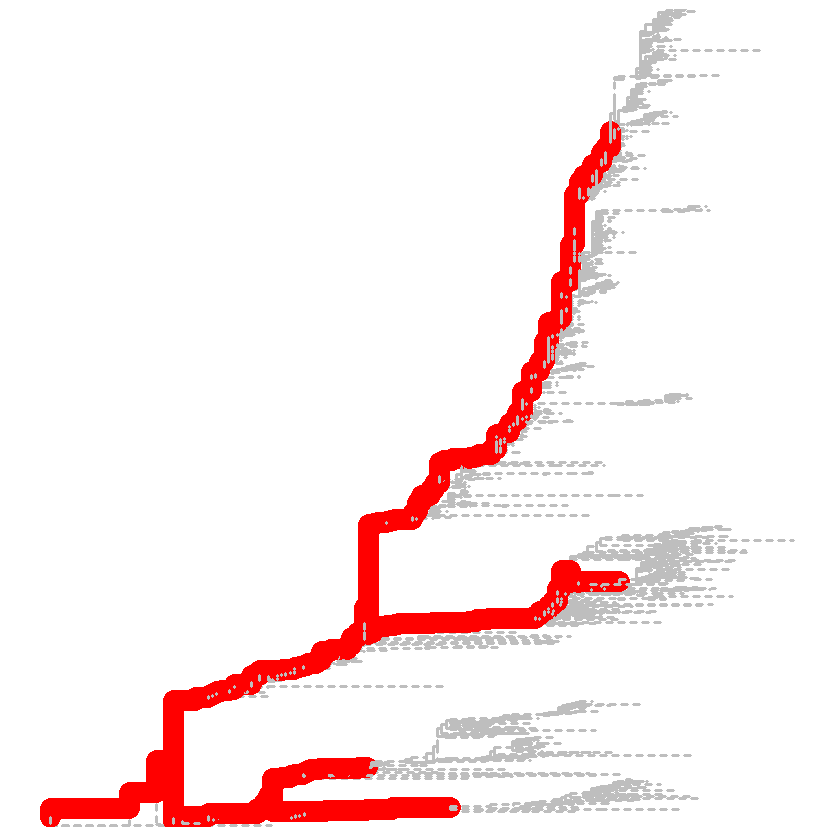

In [7]:
attr(tree, "group") <- rep(1, times = nTips + tree$Nnode)
attr(tree, "group")[unique(unlist(paths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = nTips + tree$Nnode)
attr(tree, "size")[unique(unlist(paths))] <- 0.5

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("red", "grey")) + 
    theme(legend.position = "none")
p

In [8]:
ggsave(
    filename = file.path(PLOTS_DIR, "lineages.svg"),
    plot = p, 
    device = "svg",
    width = 12,
    height = 18
)

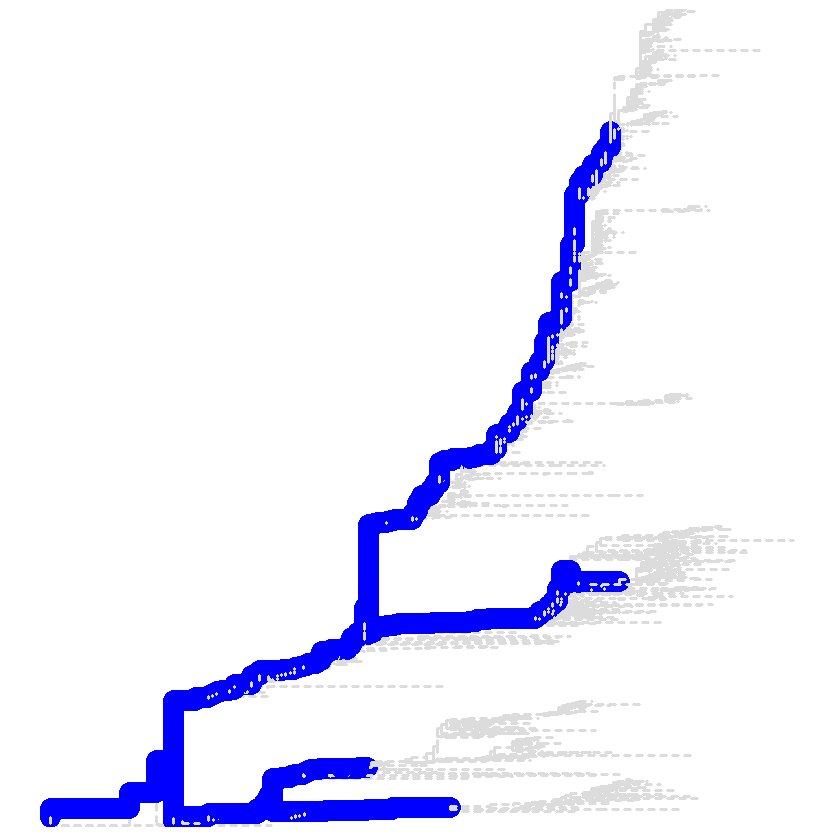

In [9]:
p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [10]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway0.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

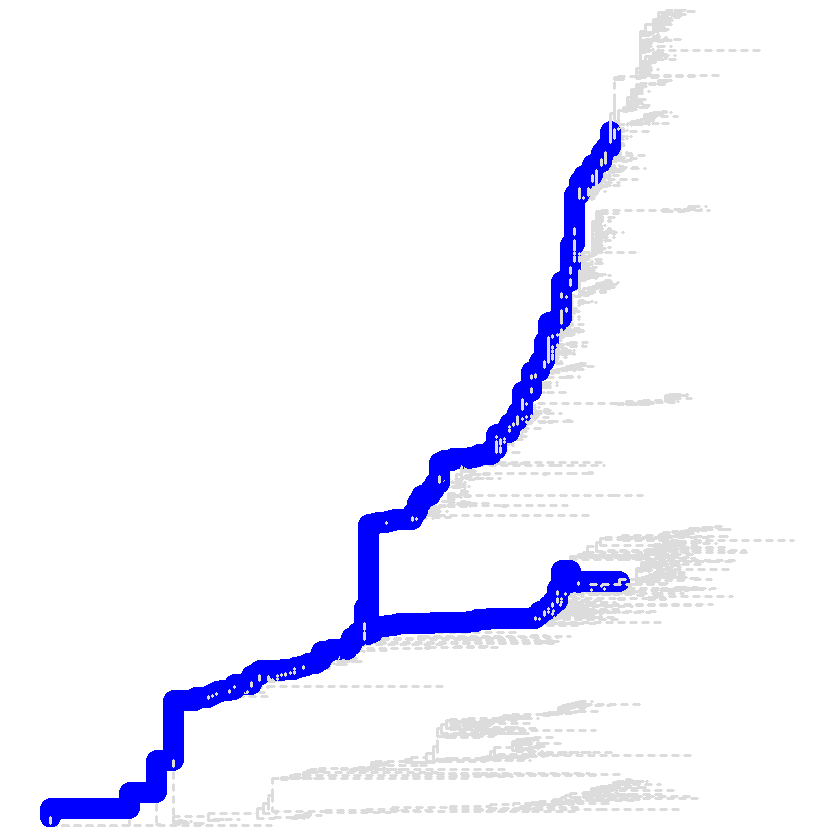

In [11]:
subPaths <- paths[2:3]

attr(tree, "group") <- rep(1, times = nTips + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = nTips + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "#DCDCDC")) + 
    theme(legend.position = "none")
p

In [12]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway1.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

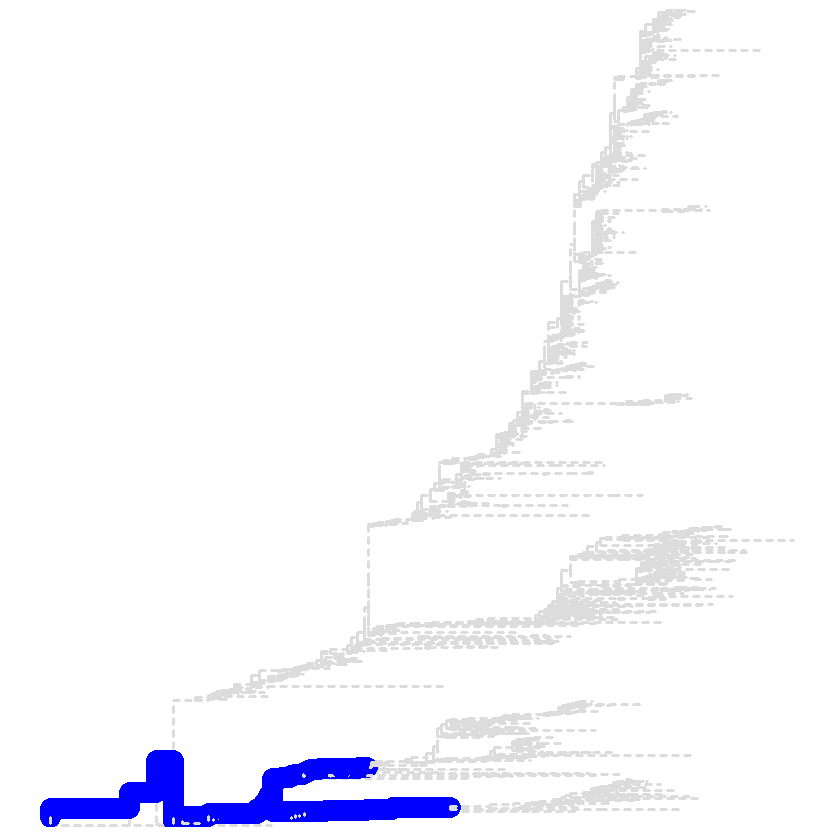

In [13]:
subPaths <- paths[c(1, 4)]

attr(tree, "group") <- rep(1, times = nTips + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = nTips + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [14]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway2.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

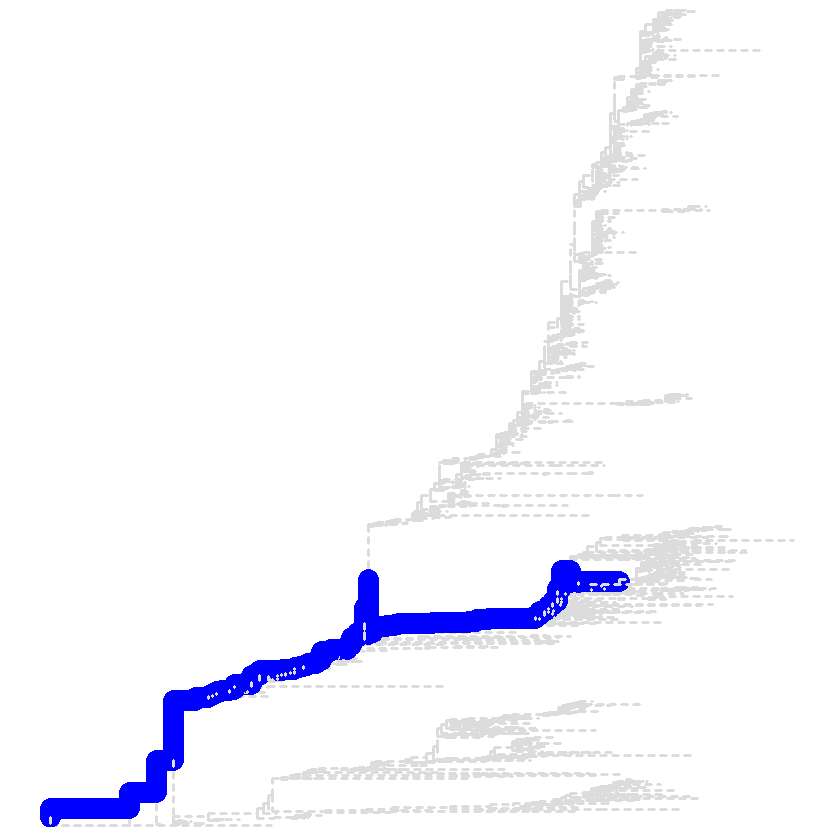

In [15]:
subPaths <- paths[2]

attr(tree, "group") <- rep(1, times = nTips + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = nTips + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [16]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway3.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

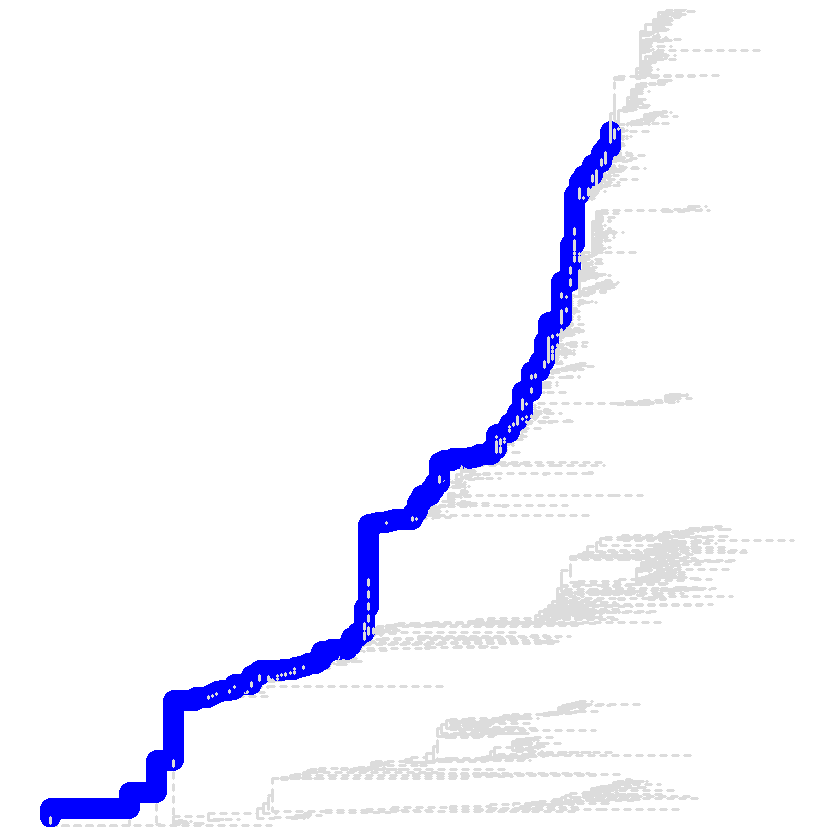

In [17]:
subPaths <- paths[3]

attr(tree, "group") <- rep(1, times = nTips + tree$Nnode)
attr(tree, "group")[unique(unlist(subPaths))] <- 0
attr(tree, "group") <- factor(attr(tree, "group"))

attr(tree, "size") <- rep(0.01, times = nTips + tree$Nnode)
attr(tree, "size")[unique(unlist(subPaths))] <- 3

p <- ggtree(tree, aes(color=group, linetype=group, size=size)) + 
    scale_color_manual(values = c("blue", "gainsboro")) + 
    theme(legend.position = "none")
p

In [18]:
ggsave(
    filename = file.path(PLOTS_DIR, "pathway4.svg"),
    plot = p, 
    device = "svg",
    width = 10,
    height = 12
)

In [19]:
mutations <- fixationSites(paths)

In [20]:
grp <- fixationPath(mutations)

Warning message:
"`mutate_()` is deprecated as of dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


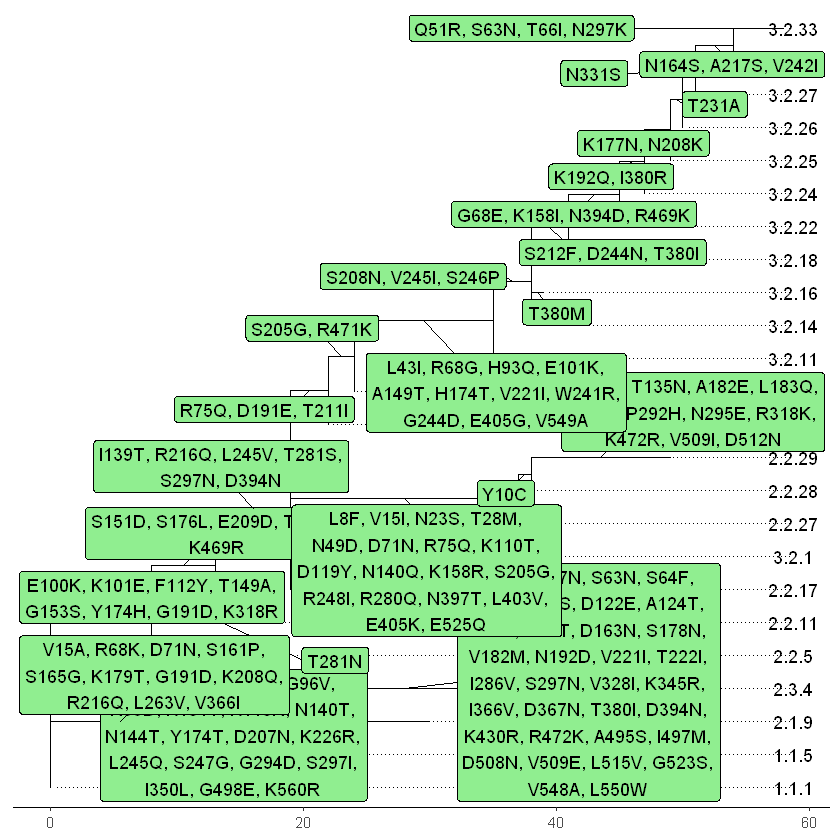

In [21]:
plot(grp)

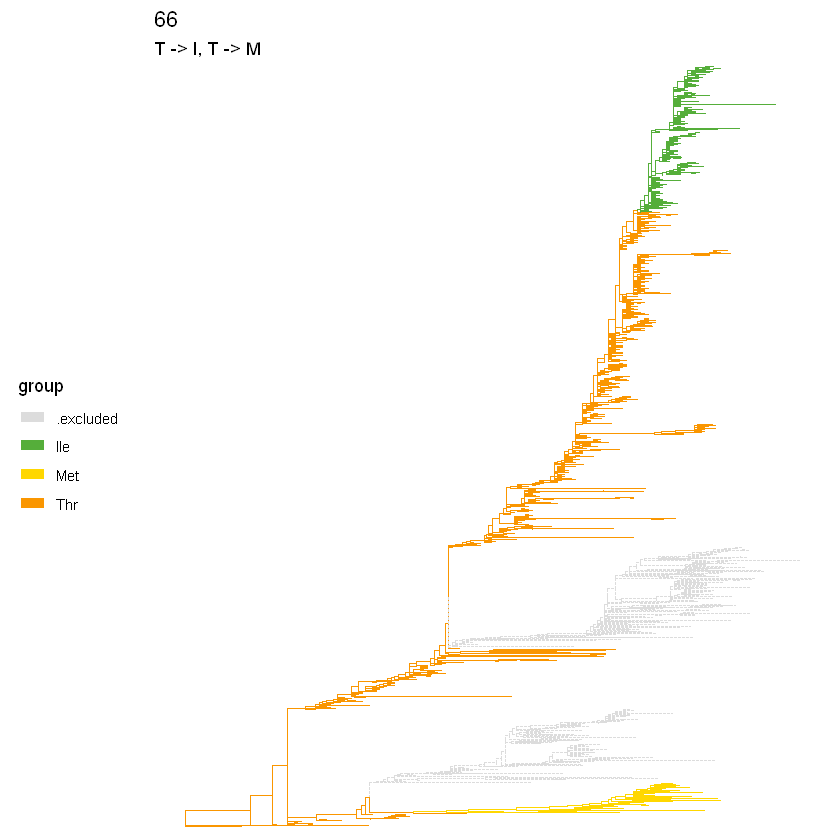

In [22]:
plotSingleSite(mutations, 66)

In [23]:
svg(filename = file.path(PLOTS_DIR, "singleFixation.svg"), width = 10, height = 12)
plotSingleSite(mutations, 212)
invisible(dev.off())

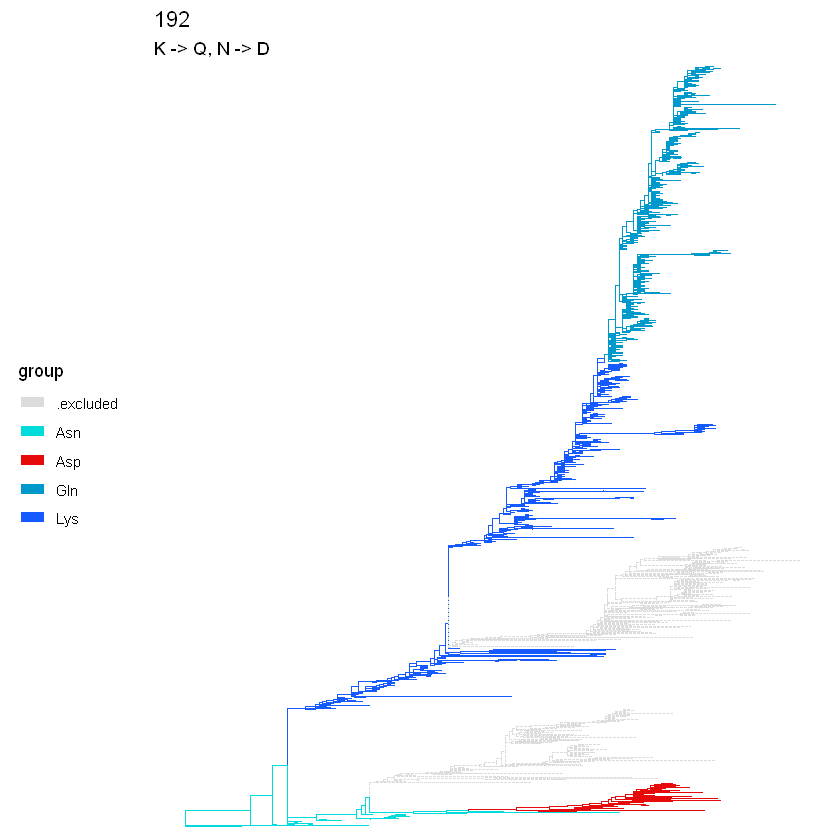

In [24]:
plotSingleSite(mutations, 192)

In [25]:
svg(filename = file.path(PLOTS_DIR, "multiFixation.svg"), width = 10, height = 12)
plotSingleSite(mutations, 192)
invisible(dev.off())

Warning message:
"`filter_()` is deprecated as of dplyr 0.7.0.
Please use `filter()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."


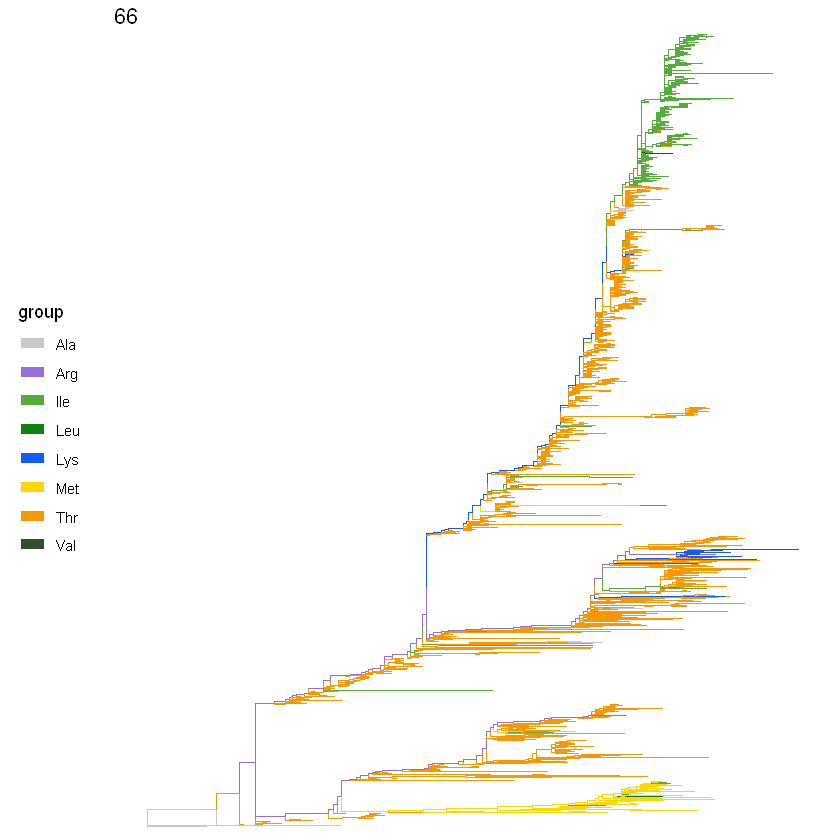

In [26]:
plotSingleSite(paths, 66)

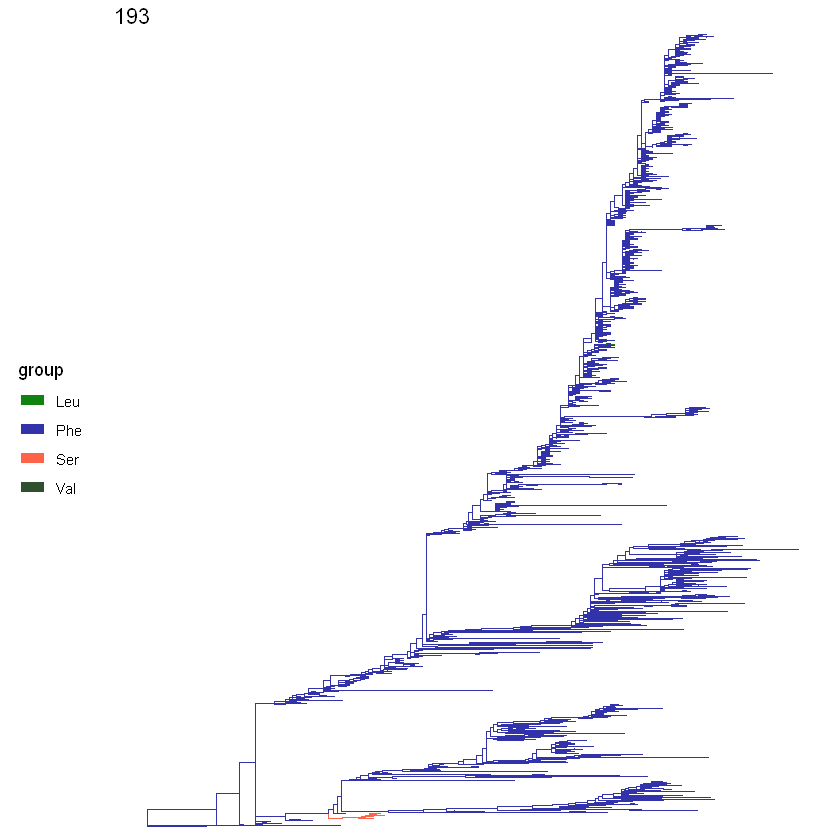

In [27]:
plotSingleSite(paths, 193)